# 1.  Import

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP 

## Initilize Medipipe Hands Model

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

## Draw Landmarks Function

In [4]:
def draw_styled_landmarks(image, results):
    """
    Draws the styled landmarks on the image using the results from MediaPipe Holistic.
    
    Parameters:
    - image: The video image on which to draw the landmarks.
    - results: The detection results from MediaPipe Holistic.
    """
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_holistic.FACEMESH_TESSELATION, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    
    # Draw right hand landmarks  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [5]:
# def draw_styled_landmarks(image, results):
#     # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
#     # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
#     # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                              ) 
#     # Draw right hand connections  
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                              ) 

## Detection Function

In [6]:
def mp_detection(image, model):
    # Convert the image from RGB to BGR format
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Convert image from RGB to BGR
    
    # Disable writing to the image to save memory
    image.flags.writeable = False # Set image as not writeable
    
    # Process the image with the specified MediaPipe model
    results = model.process(image) # Perform detection using the model
    
    # Enable writing to the image again
    image.flags.writeable = True # Set image as writeable again
    
    # Convert the image back from BGR to RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert back to RGB
    
    # Return the processed image and the detection results
    return image, results


## Access webcam using opencv   
## Detection using mediapipe

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mp_detection(frame, holistic)
        print(results)
        

        draw_styled_landmarks(image,results)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

d:\study\b3project\ASL-Translator\b3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [8]:
draw_styled_landmarks(frame,results)

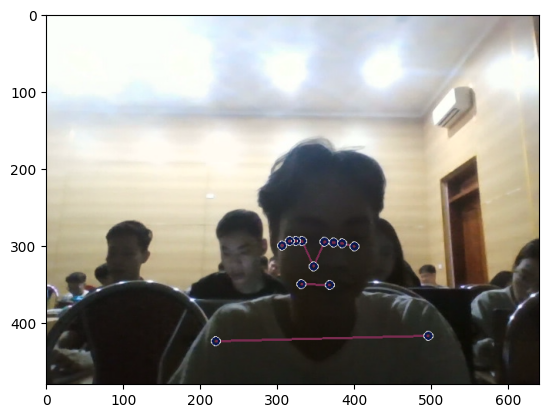

In [9]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

## 3.1 Extract attribute, if there are not available, replave with array of zeros

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
extract_keypoints(results).shape

(1662,)

# 4 Set up folders for collection

## 4.1 Variables for storing

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
# 30 videos for each action
no_sequences = 30

# Videos are going to be 30 frames in length
# Each video would have 30 frames
sequence_length = 30


## 4.2 Storing

In [17]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [20]:
# Access device cam
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mp_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6 Preprocessing Data

In [21]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## 6.1 Labels

In [ ]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

Load frame data

an element of 'sequences' is a list of frames 


labels is a list of correspond to a sequence

In [ ]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res) #append frame data to window
        sequences.append(window)
        labels.append(label_map[action]) # append sequence and label to list

In [ ]:
np.array(labels).shape

(90,)

## 6.2 Split data

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(90, 30, 1662)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
y.shape

(90, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# 7.LSTM model

## 7.1 Build

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

d:\study\b3project\ASL-Translator\b3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Optimizer (Adam): Adjusts learning rates to speed up and stabilize training.

Loss Function (Categorical Crossentropy): Quantifies the difference between predicted and actual class probabilities.

Metrics (Categorical Accuracy): Evaluates the model's prediction accuracy for multi-class classification.

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - categorical_accuracy: 0.2700 - loss: 3.7090
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3091 - loss: 6.5983
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3288 - loss: 13.6957
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3269 - loss: 18.8976
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3719 - loss: 23.7054
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.3073 - loss: 12.6995
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.2975 - loss: 22.3546
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.4442 - loss: 17.6738
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3875 - loss: 21.6739
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.2994 - loss: 26.6798
Epoch 11/2000
3/3 ━━━

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make prediction

## 8.1 Predict

In [ ]:
model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


array([[0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177]], dtype=float32)

In [ ]:
res[0]

0.6102547645568848

In [ ]:
actions

array(['hello', 'thanks', 'iloveyou'], dtype='<U8')

In [ ]:
actions[np.argmax(res[0])]

'hello'

# 9. Save weights

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

# 10. Evaluation

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [ ]:
yhat

array([[0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177],
       [0.3420942 , 0.31697398, 0.34093177]], dtype=float32)

In [ ]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 0, 56],
        [ 0, 29]],

       [[58,  0],
        [27,  0]],

       [[56,  0],
        [29,  0]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

0.3411764705882353

# 11. Test in Real Time

In [ ]:
#
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mp_detection(frame, holistic)
        print(results)
        

        draw_styled_landmarks(image,results)

        #Prediction

        keypoints = extract_keypoints(results)
        sentence.insert(0, keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis = 0))[0]
            print(actions[np.argmax(res)])
            

        #render
        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])
        if len(sequence) > 5:
            sentence = sentence[-5]


        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

d:\study\b3project\ASL-Translator\b3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mp_detection(frame, holistic)
        # print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        # sequence.append(keypoints)
        # sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms